In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score


Load Dataset

In [2]:
colums_names = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch',
                'Ticket','Fare','Cabin','Embacked']
df_train = pd.read_csv('titanic.train.csv',names=colums_names)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embacked
0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S


In [3]:
colums_names = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch',
                'Ticket','Fare','Cabin','Embacked']
df_test = pd.read_csv('titanic2.test.csv',names=colums_names)

df_test.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embacked
0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NaN
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,NaN,S,NaN
3,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q,NaN
4,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S,NaN


Split The Data To Predict Who will survive

In [4]:

X_train = df_train.loc[:,df_train.columns != 'Survived']
y_train = df_train.Survived
print(y_train.head())
lebel_en = LabelEncoder()
y_train = lebel_en.fit_transform(y_train)

0    Survived
1           0
2           1
3           1
4           1
Name: Survived, dtype: object


In [5]:
X2_test = df_train.loc[:,df_test.columns != 'Survived']
y2_test = df_train.Survived
print(y2_test.head())
lebel_en = LabelEncoder()
y_test= lebel_en.fit_transform(y2_test)

0    Survived
1           0
2           1
3           1
4           1
Name: Survived, dtype: object


In [6]:
X_train_encoded = pd.get_dummies(X_train,drop_first=True)
X2_test_encoded = pd.get_dummies(X2_test,drop_first=True)

Test Data

Accuracy 0.7858744394618834


C:\Users\1040 G3\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

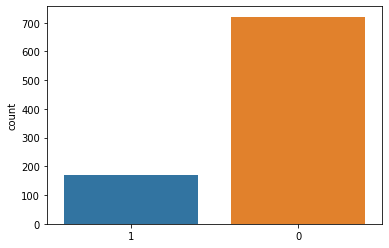

In [7]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf.fit(X2_test_encoded,y2_test)
y_pred = clf.predict(X2_test_encoded)
print('Accuracy',metrics.accuracy_score(y2_test,y_pred))

sns.countplot(y_pred,data=df_test)



In [8]:
submission = df_test[['PassengerId']]
submission

,PassengerId
0,PassengerId
1,892
2,893
3,894
4,895
...,...
414,1305
415,1306
416,1307
417,1308


In [9]:
submission['Survived'] = y2_test


C:\Users\1040G3~1\AppData\Local\Temp/ipykernel_13308/4158308196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Survived'] = y2_test


In [10]:
submission

,PassengerId,Survived
0,PassengerId,Survived
1,892,0
2,893,1
3,894,1
4,895,1
...,...,...
414,1305,0
415,1306,1
416,1307,0
417,1308,1


In [11]:
submission.to_csv('submission.csv',index=None)

In [12]:
pd.read_csv('submission.csv')


,PassengerId,Survived
0,PassengerId,Survived
1,892,0
2,893,1
3,894,1
4,895,1
...,...,...
414,1305,0
415,1306,1
416,1307,0
417,1308,1
